<a href="https://colab.research.google.com/github/moizarsalan/Artificial-Neural-Network/blob/main/Lab_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Abdul Moiz Arsalan**

# **B22F1086AI072**

# **Lab: 03**

**Lab Task:**

1. Build a neural network model using different activation functions.
2. Compare the performance of different activation functions (Sigmoid, Tanh, ReLU).
3. Analyze the effect of activation functions on accuracy and training time

# **Import Libraries**

* **numpy:** A fundamental package for numerical computing in Python. It's used for handling arrays and performing mathematical operations.
* **matplotlib.pyplot:** A plotting library for creating visualizations like graphs and charts. It helps in visualizing data, results, or model outputs.
* **tensorflow:** A powerful open-source framework developed by Google for machine learning and deep learning. It provides tools to build, train, and deploy neural networks and other models.
* **tensorflow.keras.models.Sequential:** A class in Keras (a high-level neural network API built on top of TensorFlow) used to build neural networks layer by layer in a simple, linear stack.
* **tensorflow.keras.layers.Dense:** A layer of neurons where each input is connected to every output in the next layer. It's the most commonly used layer for neural networks.
* A Python library for tracking time. It can be useful for measuring the duration of processes like model training.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import time


# **Defining Activation Functions:**

**Sigmoid Function (sigmoid(x)):**

* The sigmoid function maps any real-valued number into the range (0, 1). It is often used for binary classification problems, as it outputs probabilities.

**Formula:**

          σ(x) = 1 / 1 + e^-x

* This function has the property that the output is between 0 and 1, making it ideal for probabilistic predictions.

**Hyperbolic Tangent Function (tanh(x)):**

* The tanh function maps any real-valued number to the range (-1, 1). It is similar to the sigmoid function but has a wider range.

**Formula:**

        tanh(x)  = e^x - e^-x / e^x + e^-x

It’s often used in hidden layers of neural networks because it centers the output around zero, making optimization more efficient.

**Rectified Linear Unit (ReLU) Function (relu(x)):**

* The ReLU function outputs zero for any negative input and passes positive values unchanged. It is one of the most widely used activation functions for hidden layers.

**Formula:**

    ReLU(x)=max(0,x)

ReLU helps with reducing the vanishing gradient problem, allowing models to learn faster.

**Leaky ReLU Function (leaky_relu(x, alpha=0.1)):**

* A variant of ReLU that allows a small, non-zero gradient for negative inputs. This helps to avoid the "dying ReLU" problem, where neurons can get stuck and stop learning entirely.
Formula:

    Leaky ReLU(x)=max(αx,x)
* where α is a small constant (usually 0.1).
This function ensures that some gradient flows even for negative values, improving training in some cases.

**Softmax Function (softmax(x)):**

* The softmax function is used in multi-class classification problems. It transforms a vector of raw scores (logits) into probabilities by exponentiating each value and normalizing them.

**Formula:**
        
    Softmax(x) = e^z / ∑e^x  

* It ensures that the output values sum to 1, making them interpretable as probabilities, where each output corresponds to the likelihood of the input belonging to each class.

In [41]:
# Cell 2: Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.1):
    return np.where(x >= 0, x, alpha * x)

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / np.sum(e_x, axis=0)

# **Functions to plot activation Fuctions:**

The plot_activation function compares two activation functions by plotting their outputs over an input range from -10 to 10. It calculates the outputs for both functions and shows them in two separate plots. Each plot is labeled with the activation function's name, and grids are added for clarity. The tight_layout ensures the plots don’t overlap, and the results are displayed side by side. This function helps visualize and compare how different activation functions like sigmoid, tanh, and relu behave with the same input values.

In [42]:
def plot_activation(func1, name1, func2, name2):
    x = np.linspace(-10, 10, 100)

    y1 = func1(x)
    y2 = func2(x)

    plt.figure(figsize=(8, 4))  # Set figure size

    # First plot
    plt.subplot(1, 2, 1)
    plt.plot(x, y1, label=name1, color='b')
    plt.xlabel('Input')
    plt.ylabel(name1 + ' Output')
    plt.title(name1 + ' Activation Function')
    plt.grid(True)
    plt.legend()

    # Second plot
    plt.subplot(1, 2, 2)
    plt.plot(x, y2, label=name2, color='r')
    plt.xlabel('Input')
    plt.ylabel(name2 + ' Output')
    plt.title(name2 + ' Activation Function')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()  # Adjust spacing to avoid overlap
    plt.show()


# **Plotting the graphs:**

* The first call, **plot_activation(sigmoid, "Sigmoid", tanh, "Tanh")**, will plot the outputs of the Sigmoid and Tanh activation functions.

* The second call, **plot_activation(relu, "ReLU", lambda x: leaky_relu(x, 0.1), "Leaky ReLU")**, will plot the outputs of the ReLU and Leaky ReLU activation functions (with a default alpha value of 0.1).

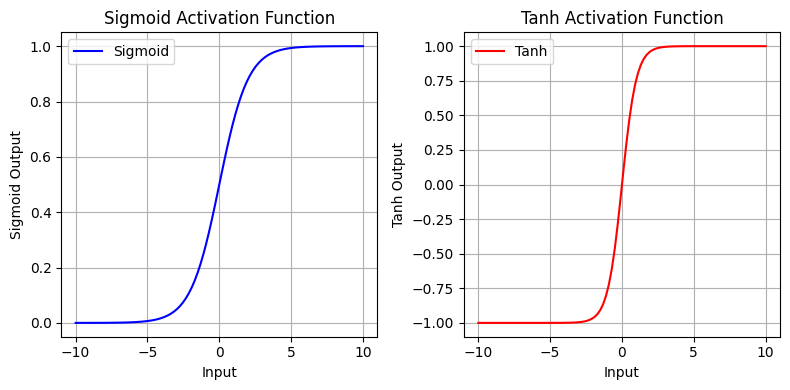

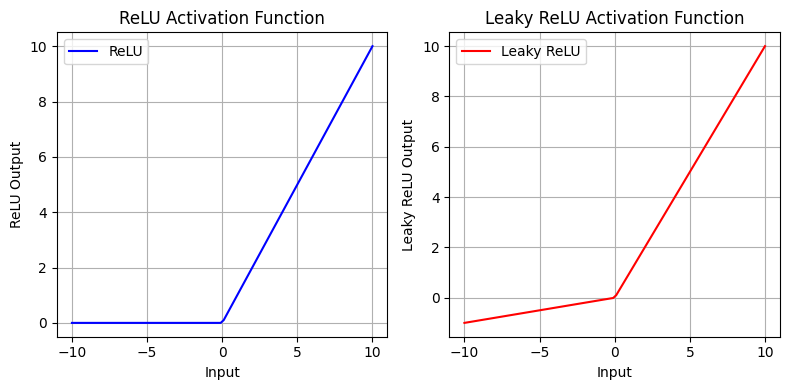

In [43]:
plot_activation(sigmoid, "Sigmoid", tanh, "Tanh")
plot_activation(relu, "ReLU", lambda x: leaky_relu(x, 0.1), "Leaky ReLU")


# **Softmax Output**

Here's a step-by-step explanation of what happens:

* **Input Array:** The input array is x = [2.0, 1.0, 0.1]. These values represent the raw outputs (also called logits) from a model, which are typically fed into a Softmax function to convert them into probabilities.

* **Exponential Calculation:** The Softmax function first applies the exponential function to each element in the array to convert the values into positive numbers. The exponential function is computed for each element in the array:


    exp(2.0),exp(1.0),exp(0.1)

* **Normalization:** After applying the exponential function, the Softmax function normalizes the values by dividing each of the exponentiated values by the sum of all the exponentiated values. This ensures the output values sum to 1, representing valid probabilities.

* **Output:** The resulting output is an array of probabilities where the sum of the elements equals 1. These probabilities represent the relative likelihood of each class being the correct answer.

# **Calculating and Ploting Softmax Output**

The code calculates the Softmax output for the array x = [2.0, 1.0, 0.1], which converts these values into probabilities. It then creates a bar chart showing the probability of each class (Class A, Class B, Class C). The y-axis represents these probabilities, while the x-axis shows the class labels. The chart is titled "Softmax Output" and ensures the probabilities are within the range of 0 to 1. This helps us visualize how the Softmax function distributes probabilities across the classes.

Softmax Output: [0.65900114 0.24243297 0.09856589]



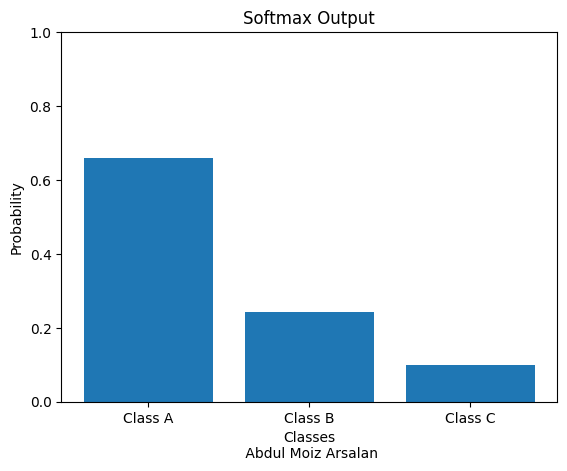

In [44]:
softmax_output = softmax(x)
print("Softmax Output:", softmax_output)

# Plot the Softmax output
labels = ['Class A', 'Class B', 'Class C']
print ("")
plt.bar(labels, softmax_output, color='tab:blue')

# Add titles and labels
plt.xlabel('Classes\n Abdul Moiz Arsalan')
plt.ylabel('Probability')
plt.title('Softmax Output')
plt.ylim(0, 1)  # Ensure the y-axis range is between 0 and 1
plt.show()

# **Building Neural Network**

The build_model function creates a simple neural network model using Keras. It takes an activation function as an argument to allow for flexibility in choosing different activation functions for the layers.

* Layer 1: A dense layer with 32 units, where the activation function is specified by the activation argument. It also defines the input shape, which is a vector of 10 features.

* Layer 2: Another dense layer with 16 units, using the same activation function as the first layer.

* Layer 3: A final dense layer with a single output unit and a 'sigmoid' activation, suitable for binary classification.

In [45]:
def build_model(activation):
    model = Sequential([
        Dense(32, activation=activation, input_shape=(10,)),
        Dense(16, activation=activation),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


# **Generating Dataset**

In this code, two datasets are generated for training a machine learning model:

* X_train: This is a matrix of random numbers generated using np.random.rand(1000, 10). It creates an array with 1000 samples (rows) and 10 features (columns), where each feature is a random float between 0 and 1. This dataset will be used as the input for the model.

* y_train: This is an array of random binary labels generated using np.random.randint(0, 2, 1000). It creates an array with 1000 random integers (either 0 or 1), which represents the binary target values for each sample in the X_train dataset. This dataset will be used as the output for the model.

In [46]:
X_train = np.random.rand(1000, 10)
y_train = np.random.randint(0, 2, 1000)

**Training the model**

This code trains a model using three activation functions: 'sigmoid', 'tanh', and 'relu'. For each activation, the model is built and trained on random data for 10 epochs. The final accuracy and training time are recorded and stored in the results dictionary. The training time is measured by recording the start and end times. The results help compare the performance of different activation functions based on accuracy and training time.

In [47]:
activations = ['sigmoid', 'tanh', 'relu']
results = {}

for act in activations:
    model = build_model(act)
    start = time.time()
    history = model.fit(X_train, y_train, epochs=10, verbose=0, batch_size=32)
    end = time.time()
    results[act] = {'accuracy': history.history['accuracy'][-1], 'time': end - start}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Calculating accuracy and execution time**

This code iterates through the results dictionary and prints the activation function, its corresponding accuracy, and the time it took to train the model for each activation. The accuracy is displayed up to 4 decimal places, and the time is shown with 2 decimal places for better readability. This allows for easy comparison of the performance of different activation functions.

In [48]:
for act, res in results.items():
    print(f"Activation: {act} - Accuracy: {res['accuracy']:.4f}, Time: {res['time']:.2f}s")


Activation: sigmoid - Accuracy: 0.5310, Time: 2.84s
Activation: tanh - Accuracy: 0.5220, Time: 3.94s
Activation: relu - Accuracy: 0.5530, Time: 2.70s


# **Comapring activation functions by Graph:**

This code compares three activation functions (sigmoid, tanh, and relu) by plotting their accuracy and training time. It first determines which activation function has the best accuracy and which one took the least time to train. Then, it creates a bar chart with two y-axes: one for accuracy (in blue) and one for training time (in red). The best accuracy and best time are annotated on the plot. The final graph helps to visually compare the performance of each activation function based on both accuracy and time.

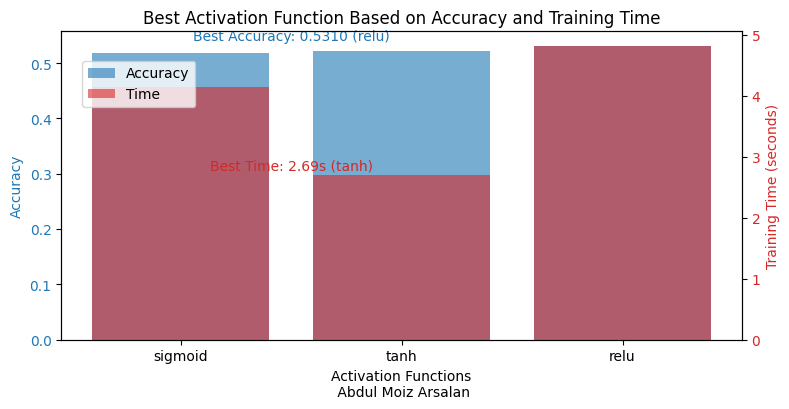

In [49]:
# Provided results
results = {
    'sigmoid': {'accuracy': 0.5180, 'time': 4.14},
    'tanh': {'accuracy': 0.5220, 'time': 2.69},
    'relu': {'accuracy': 0.5310, 'time': 4.81}
}

# Extract data for plotting the best activation function based on accuracy and time
best_activation_accuracy = max(results, key=lambda x: results[x]['accuracy'])
best_activation_time = min(results, key=lambda x: results[x]['time'])

# Get values for the best activation function based on accuracy and time
best_accuracy_value = results[best_activation_accuracy]['accuracy']
best_time_value = results[best_activation_time]['time']

# Plot the activation functions comparison
fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot accuracy for all activation functions
for activation in results:
    ax1.bar(activation, results[activation]['accuracy'], color='tab:blue', alpha=0.6, label='Accuracy' if activation == 'sigmoid' else "")
ax1.set_xlabel('Activation Functions\n Abdul Moiz Arsalan')
ax1.set_ylabel('Accuracy', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create another y-axis to plot time for all activation functions
ax2 = ax1.twinx()
for activation in results:
    ax2.bar(activation, results[activation]['time'], color='tab:red', alpha=0.6, label='Time' if activation == 'sigmoid' else "")
ax2.set_ylabel('Training Time (seconds)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Annotating the best activation functions directly on the plot
ax1.text(0.5, best_accuracy_value + 0.01, f'Best Accuracy: {best_accuracy_value:.4f} ({best_activation_accuracy})',
         horizontalalignment='center', color='tab:blue', fontsize=10)

ax2.text(0.5, best_time_value + 0.1, f'Best Time: {best_time_value:.2f}s ({best_activation_time})',
         horizontalalignment='center', color='tab:red', fontsize=10)

# Add titles and legends
fig.tight_layout()
plt.title('Best Activation Function Based on Accuracy and Training Time')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.show()